In [3]:
from math import *
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

In [16]:
y = lambda x: pow((x-1),2)
data = np.array([(i,y(i)) for i in np.linspace(0.,2.,20)])
data_colocation = np.array([(data[i]+data[i+1])/2 for i in range(len(data)-1) ])

In [17]:
data

array([[0.        , 1.        ],
       [0.10526316, 0.80055402],
       [0.21052632, 0.6232687 ],
       [0.31578947, 0.46814404],
       [0.42105263, 0.33518006],
       [0.52631579, 0.22437673],
       [0.63157895, 0.13573407],
       [0.73684211, 0.06925208],
       [0.84210526, 0.02493075],
       [0.94736842, 0.00277008],
       [1.05263158, 0.00277008],
       [1.15789474, 0.02493075],
       [1.26315789, 0.06925208],
       [1.36842105, 0.13573407],
       [1.47368421, 0.22437673],
       [1.57894737, 0.33518006],
       [1.68421053, 0.46814404],
       [1.78947368, 0.6232687 ],
       [1.89473684, 0.80055402],
       [2.        , 1.        ]])

In [18]:
data_colocation

array([[0.05263158, 0.90027701],
       [0.15789474, 0.71191136],
       [0.26315789, 0.54570637],
       [0.36842105, 0.40166205],
       [0.47368421, 0.27977839],
       [0.57894737, 0.1800554 ],
       [0.68421053, 0.10249307],
       [0.78947368, 0.04709141],
       [0.89473684, 0.01385042],
       [1.        , 0.00277008],
       [1.10526316, 0.01385042],
       [1.21052632, 0.04709141],
       [1.31578947, 0.10249307],
       [1.42105263, 0.1800554 ],
       [1.52631579, 0.27977839],
       [1.63157895, 0.40166205],
       [1.73684211, 0.54570637],
       [1.84210526, 0.71191136],
       [1.94736842, 0.90027701]])

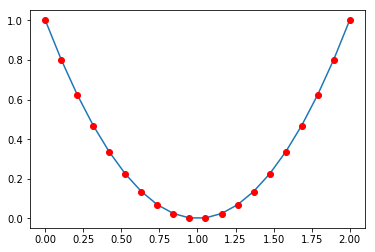

In [19]:
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.show()

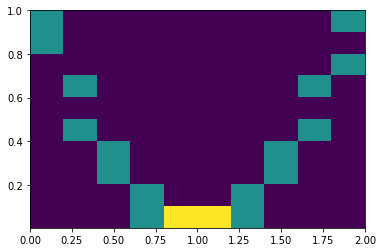

In [20]:
plt.hist2d(data[:,0], data[:,1])
plt.show()

In [ ]:
def tau(array,j):
    return (array[0,j+1] - array[0,j])/(sqrt(pow((array[0,j+1] - array[0,j]),2)+pow((),2)))
    